In [42]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Reading CSV File
df = pd.read_csv('/content/placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
745,6.82,13.0,1
19,7.63,29.0,0
718,7.12,36.0,1
420,7.59,49.0,0
525,6.33,17.0,0


In [44]:
# Shape of the DataFrame
df.shape

(1000, 3)

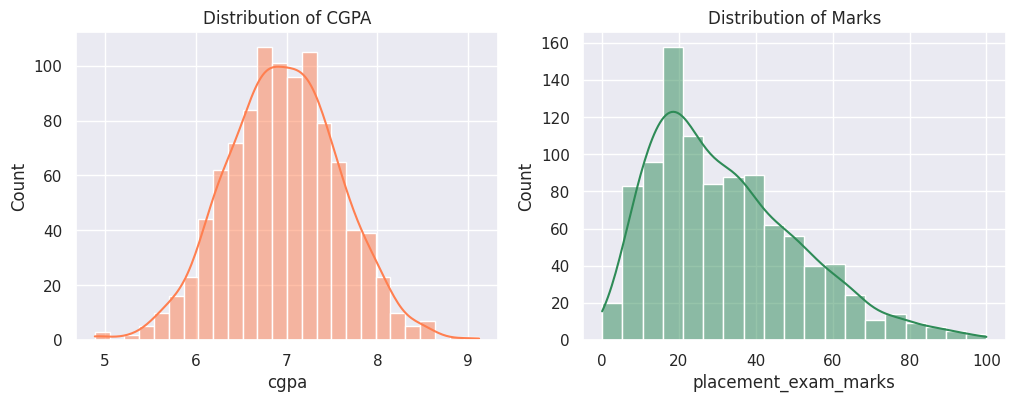

In [45]:
# Distribution of CGPA and Marks Column
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(df["cgpa"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of CGPA")
sns.histplot(df["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1])
ax[1].set_title("Distribution of Marks")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


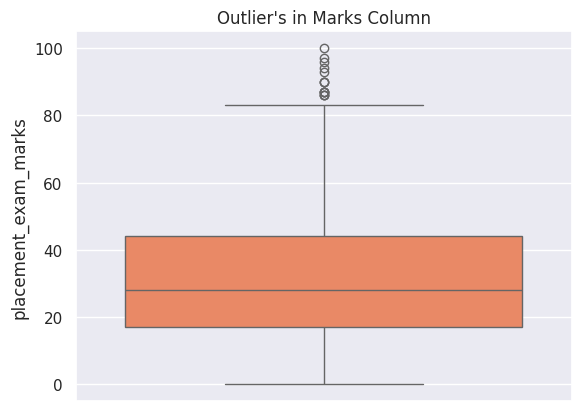

In [46]:
# Box Plot of Marks Column
sns.boxplot(df["placement_exam_marks"], color="coral")
plt.title("Outlier's in Marks Column")
plt.show()

In [47]:
# 25th Percentile of Marks Column
percentile_25 = df["placement_exam_marks"].quantile(0.25)
print("25th Percentile :", percentile_25)

# 75th Percentile of Marks Column
percentile_75 = df["placement_exam_marks"].quantile(0.75)
print("75th Percentile :", percentile_75)

25th Percentile : 17.0
75th Percentile : 44.0


In [48]:
# Inter Quartile Range of Marks Column
iqr = percentile_75 - percentile_25
print("IQR of Marks Column :", iqr)

IQR of Marks Column : 27.0


In [49]:
# Upper limit for Outlier
upper_limit = percentile_75 + 1.5*iqr
print("Upper Limit :", upper_limit)

# Lower limit for Outlier
lower_limit = percentile_25 - 1.5*iqr
print("Lower Limit :", lower_limit)

Upper Limit : 84.5
Lower Limit : -23.5


In [50]:
# Data that are potentially Outlier
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [51]:
# Trimming DataFrame
new_df = df[df["placement_exam_marks"] < upper_limit]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
947,6.49,70.0,0
702,6.24,39.0,0
333,6.74,20.0,1
343,7.20,70.0,1
298,6.16,48.0,0


In [52]:
# Shape of the DataFrame
new_df.shape

(985, 3)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


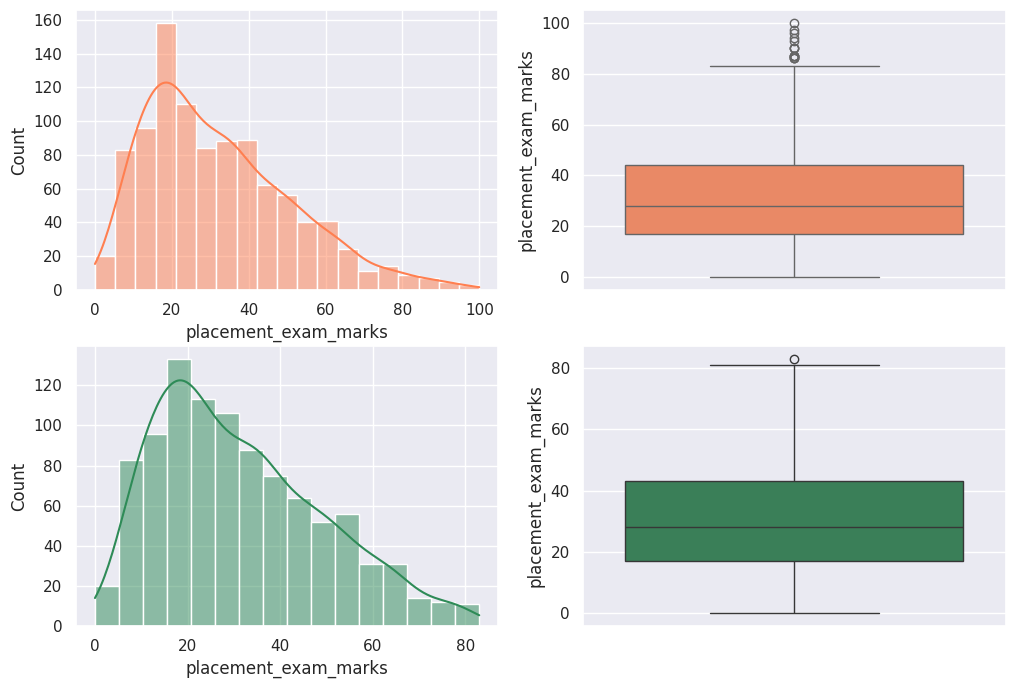

In [53]:
# Distribution and Outliers in Marks Column before and after Outlier Removal
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.histplot(df["placement_exam_marks"], kde=True, color="coral", ax=ax[0,0])
sns.histplot(new_df["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1,0])
sns.boxplot(df["placement_exam_marks"], color="coral", ax=ax[0,1])
sns.boxplot(new_df["placement_exam_marks"], color="seagreen", ax=ax[1,1])
plt.show()

In [54]:
# Capping values that are Outlier
new_df_copy = df.copy()

new_df_copy["placement_exam_marks"] = np.where(
    new_df_copy['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_copy['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_copy['placement_exam_marks']
    )
)

In [55]:
# Shape of the DataFrame
new_df_copy.shape

(1000, 3)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


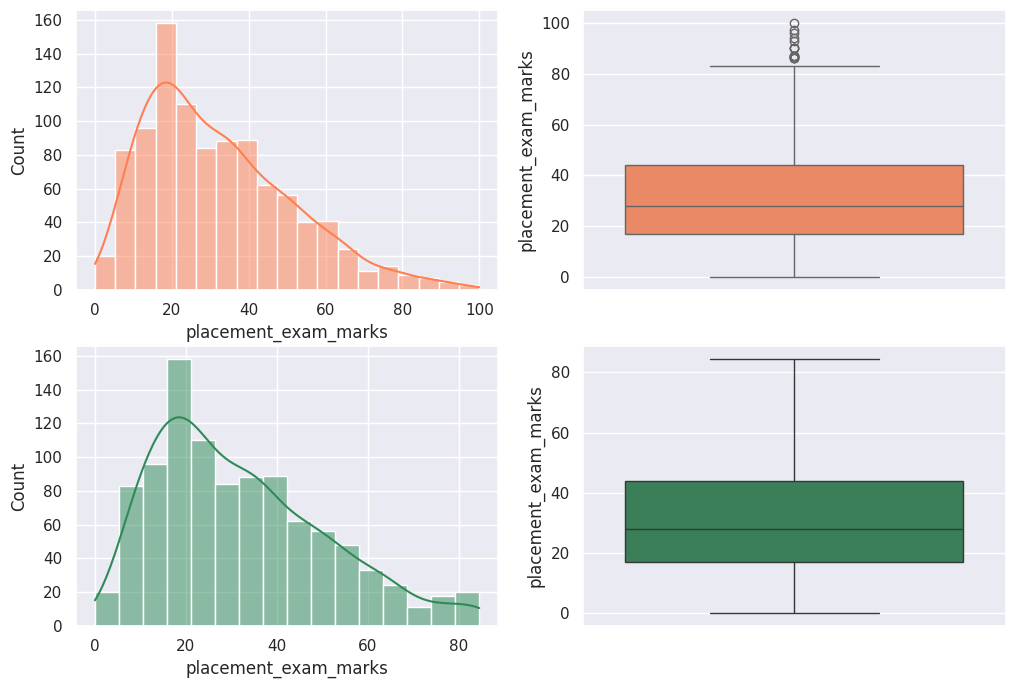

In [56]:
# Distribution and Outliers in Marks Column before and after Outlier Removal
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.histplot(df["placement_exam_marks"], kde=True, color="coral", ax=ax[0,0])
sns.histplot(new_df_copy["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1,0])
sns.boxplot(df["placement_exam_marks"], color="coral", ax=ax[0,1])
sns.boxplot(new_df_copy["placement_exam_marks"], color="seagreen", ax=ax[1,1])
plt.show()